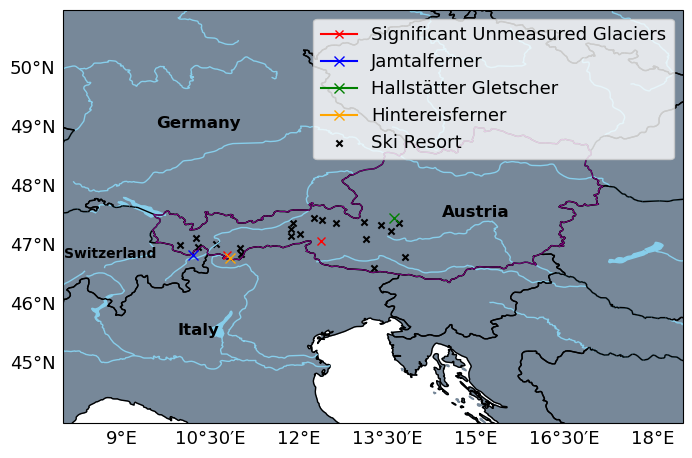

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl

mpl.rcParams['font.size'] = 13  # This sets the base font size for all text

ski_resorts = {
    "St. Anton am Arlberg":                (10.2653, 47.1287),
    "SkiWelt Wilder Kaiser-Brixental":     (12.2516, 47.4676),
    "Saalbach Hinterglemm Leogang Fieberbrunn": (12.6362, 47.3901),
    "Ischgl/Samnaun Silvretta Arena":      (10.2913, 46.9897),
    "KitzSki – Kitzbühel":                 (12.3890, 47.4467),
    "Serfaus-Fiss-Ladis":                  (10.6006, 47.0386),
    "Zillertal Arena":                     (12.0197, 47.2028),
    "Sölden":                              (11.0107, 46.9707),
    "Mayrhofen":                           (11.8640, 47.1643),
    "Silvretta Montafon":                  (9.9852, 47.0080),
    "Schladming":                          (13.6895, 47.3940),
    "Snow Space Salzburg":                 (13.3946, 47.3516),
    "Hochkönig":                           (13.1087, 47.4019),
    "Gurgl – Obergurgl":                   (11.0270, 46.8698),
    "Nassfeld – Hermagor":                 (13.2817, 46.6177),
    "Bad Kleinkirchheim":                  (13.7978, 46.8147),
    "Obertauern":                          (13.5583, 47.2490),
    "Ski Juwel Alpbachtal":                (11.8994, 47.3925),
    "Kaltenbach":                          (11.8762, 47.2922),
    "Bad Gastein":                         (13.1372, 47.1153),
}

kesselwandferner_coords = (10.79, 46.84)
mullwitzkees_coords = (12.3784, 47.0852)

# Approximate coordinates for the glaciers you mentioned
# (longitude, latitude) in decimal degrees:
jamtalferner_coords   = (10.203, 46.853)  # Silvretta region, Tyrol
hallstaetter_coords   = (13.617, 47.471)  # Dachstein area, Upper Austria
hintereisferner_coords= (10.833, 46.798)  # Ötztal Alps, Tyrol

# Create a figure and set the projection
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set extent over Austria: 
# min_lon, max_lon, min_lat, max_lat. Adjust as needed.
ax.set_extent([8, 18.5, 44.0, 51.0], crs=ccrs.PlateCarree())

# Add basic features
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.LAND, color='lightslategrey')
ax.add_feature(cfeature.LAKES, color='skyblue')
ax.add_feature(cfeature.RIVERS, edgecolor='skyblue')


ax.plot(*kesselwandferner_coords,
        marker='x', color='red',
        transform=ccrs.PlateCarree(),
        label='Significant Unmeasured Glaciers')
ax.plot(*mullwitzkees_coords,
        marker='x', color='red',
        transform=ccrs.PlateCarree()
        )

# Plot glacier marker points
ax.plot(*jamtalferner_coords, 
        marker='x', color='blue', markersize=7, 
        transform=ccrs.PlateCarree(), 
        label='Jamtalferner')
ax.plot(*hallstaetter_coords, 
        marker='x', color='green', markersize=7, 
        transform=ccrs.PlateCarree(),
        label='Hallstätter Gletscher')
ax.plot(*hintereisferner_coords, 
        marker='x', color='orange', markersize=7, 
        transform=ccrs.PlateCarree(), 
        label='Hintereisferner')

lons, lats = zip(*ski_resorts.values())
ax.scatter(
    lons, lats,
    color='black', marker='x', s=20,
    transform=ccrs.PlateCarree(),
    label="Ski Resort"
)

import cartopy.feature as cfeature

# Add borders for all countries (default black)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)

# Add Austria's border with a different color
import cartopy.io.shapereader as shpreader

# Load Natural Earth country boundaries
shapefile = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')

# Loop through shapes and match Austria
for record, geometry in zip(shpreader.Reader(shapefile).records(), shpreader.Reader(shapefile).geometries()):
    if record.attributes['NAME'] == 'Austria':  # Match Austria by name
        ax.add_geometries([geometry], ccrs.PlateCarree(),
                          edgecolor='purple', linewidth=0.7, facecolor='none')  # Set Austria’s border color


# Optionally add a legend
plt.legend(loc='upper right')

# Optionally add some gridlines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.right_labels = False
gl.top_labels = False
gl.xlines = False  # Hide meridians
gl.ylines = False  # Hide parallels

ax.text(10.3, 45.5, 'Italy', transform=ccrs.PlateCarree(),
        fontsize=12, color='black', fontweight='bold', ha='center')
ax.text(8.8, 46.8, 'Switzerland', transform=ccrs.PlateCarree(),
        fontsize=10, color='black', fontweight='bold', ha='center')
ax.text(10.3, 49, 'Germany', transform=ccrs.PlateCarree(),
        fontsize=12, color='black', fontweight='bold', ha='center')
ax.text(15, 47.5, 'Austria', transform=ccrs.PlateCarree(),
        fontsize=12, color='black', fontweight='bold', ha='center')

plt.savefig("map_projection", dpi=1000)

plt.show()
